In [1]:
import os
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
path = os.getcwd()
print(path)
os.chdir("C:/Users/USER/Downloads")
print(os.getcwd())

C:\Users\USER
C:\Users\USER\Downloads


In [4]:
data = pd.read_csv('C:/Users/USER/Downloads/customer_segmentation_data.csv.')
data.head(5)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


###### Let's start with Exploratory Data Analysis (EDA) for your dataset before proceeding with customer segmentation. EDA will help us understand the data, identify patterns, and prepare it for further analysis.

#Steps for EDA:

    1.Check the first few rows, data types, and basic statistics.
    2.Identify and handle missing values.
    3.Generate summary statistics for numerical and categorical features.
    4.Visualize the distributions of numerical features.
    5.Visualize categorical features using bar plots.
    6.Visualize relationships between features using pair plots and correlation matrices.
    7.Analyze important features that might impact customer segmentation.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [6]:
data.describe(include='all')

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
count,53503.000000,53503.000000,53503,53503,53503,53503,53503,53503.000000,53503,53503,53503,53503,53503.000000,53503.000000,53503,53503,53503,53503,53503,53503
unique,NaN,NaN,2,5,5,35,9,NaN,5,2016,5,5,NaN,NaN,4,5,5,5,5,5
top,NaN,NaN,Male,Married,Associate Degree,Lakshadweep,Salesperson,NaN,policy3,03-12-2018,Chat,policy1,NaN,NaN,Group,Mail,In-Person Meeting,Weekends,German,Segment5
freq,NaN,NaN,27499,13219,12213,2140,7919,NaN,15761,173,14153,13365,NaN,NaN,18255,11887,14311,14092,14452,13976
mean,52265.204998,44.140945,NaN,NaN,NaN,NaN,NaN,82768.324318,NaN,NaN,NaN,NaN,492580.789638,3023.702447,NaN,NaN,NaN,NaN,NaN,NaN
std,28165.000067,15.079486,NaN,NaN,NaN,NaN,NaN,36651.075670,NaN,NaN,NaN,NaN,268405.505571,1285.834295,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,20001.000000,NaN,NaN,NaN,NaN,50001.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,28950.500000,32.000000,NaN,NaN,NaN,NaN,NaN,51568.500000,NaN,NaN,NaN,NaN,249613.500000,1817.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,55858.000000,43.000000,NaN,NaN,NaN,NaN,NaN,80719.000000,NaN,NaN,NaN,NaN,477261.000000,3194.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,76096.000000,57.000000,NaN,NaN,NaN,NaN,NaN,115973.500000,NaN,NaN,NaN,NaN,739124.000000,4311.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [8]:
# Handle missing values
# For simplicity, we will fill numerical columns with the median and categorical columns with the mode
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify that missing values are handled
data.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [9]:
# summary statistics for numerical features
data[numerical_cols].describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


In [10]:
#summary statistics for categorical features
data[categorical_cols].describe()

,Gender,Marital Status,Education Level,Geographic Information,Occupation,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
count,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503
unique,2,5,5,35,9,5,2016,5,5,4,5,5,5,5,5
top,Male,Married,Associate Degree,Lakshadweep,Salesperson,policy3,03-12-2018,Chat,policy1,Group,Mail,In-Person Meeting,Weekends,German,Segment5
freq,27499,13219,12213,2140,7919,15761,173,14153,13365,18255,11887,14311,14092,14452,13976


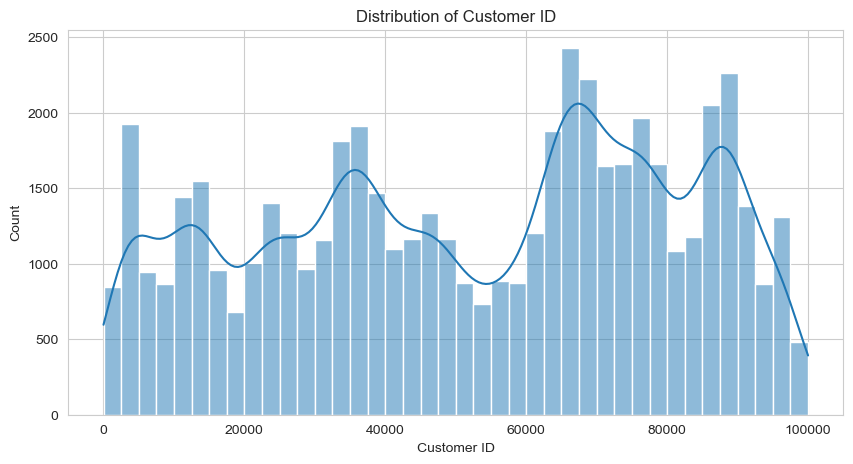

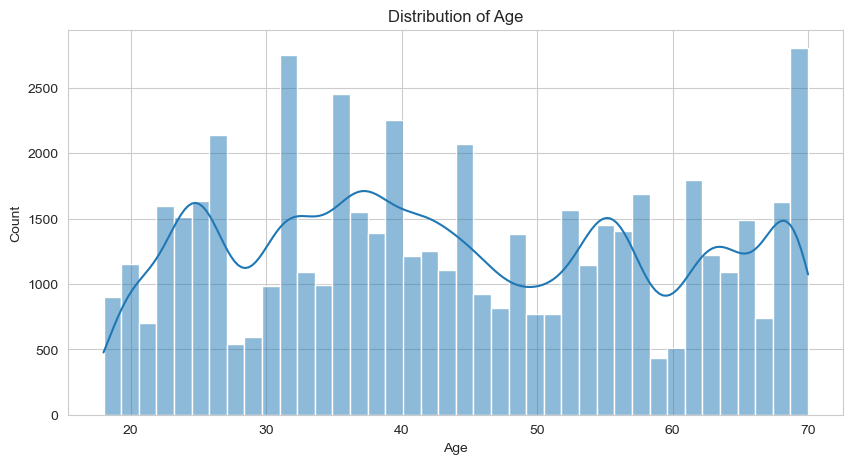

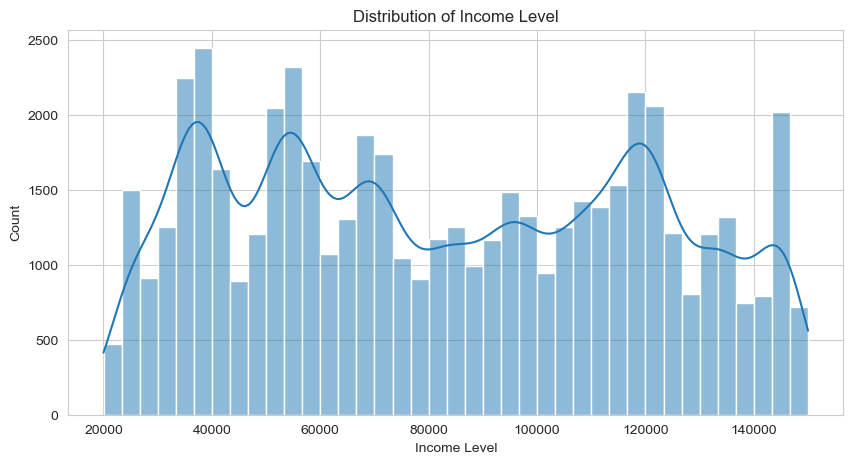

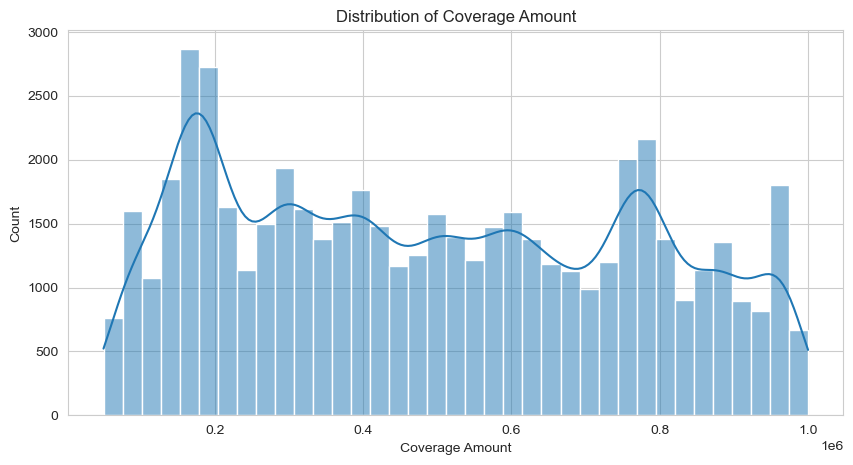

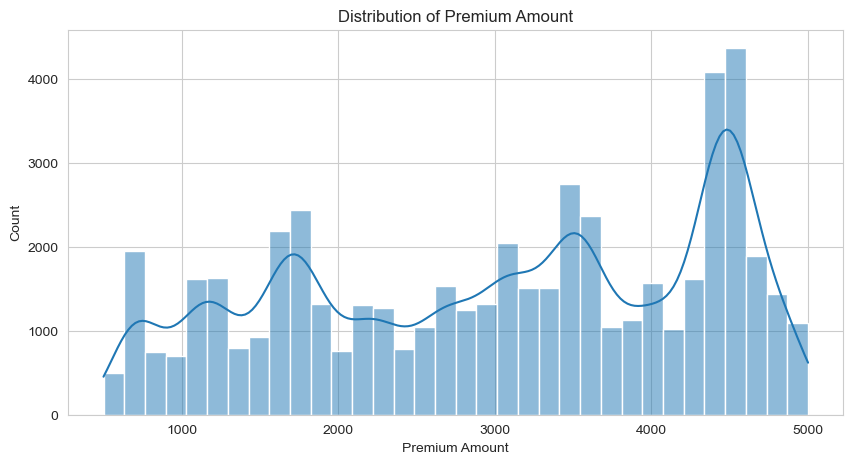

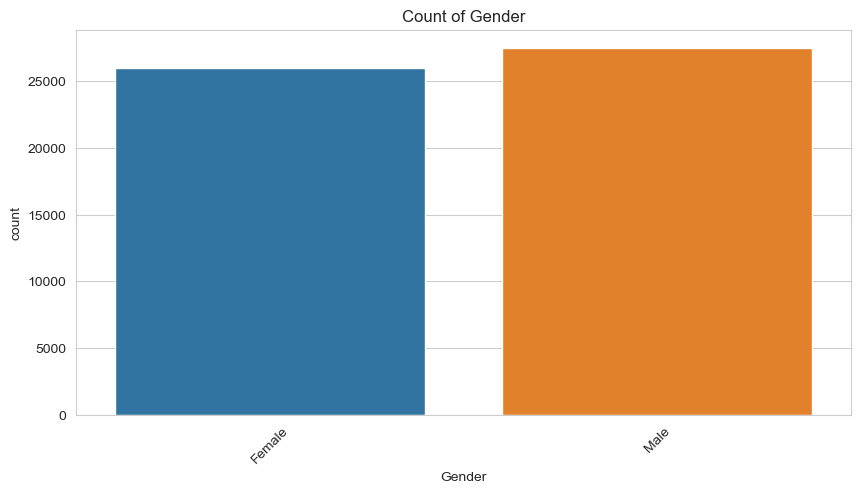

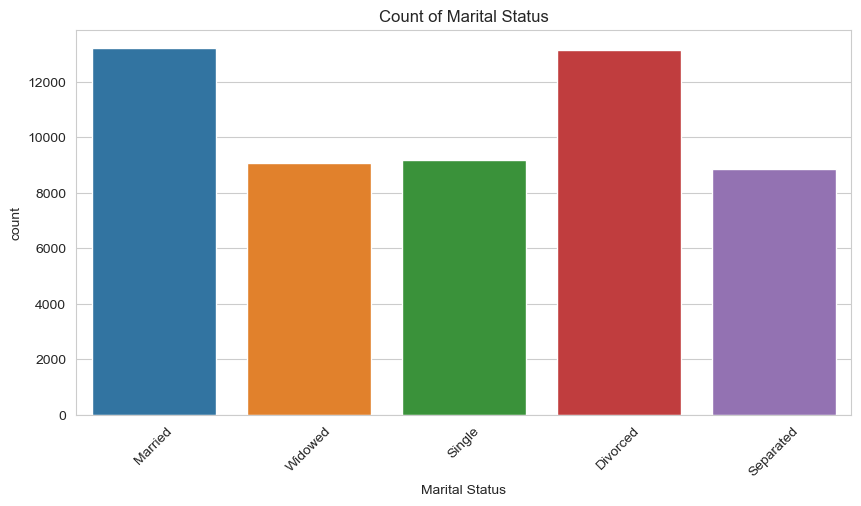

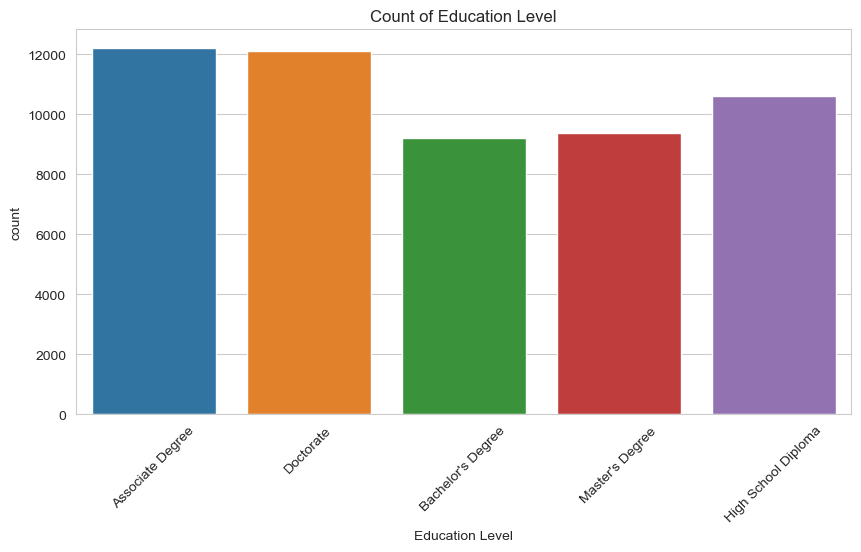

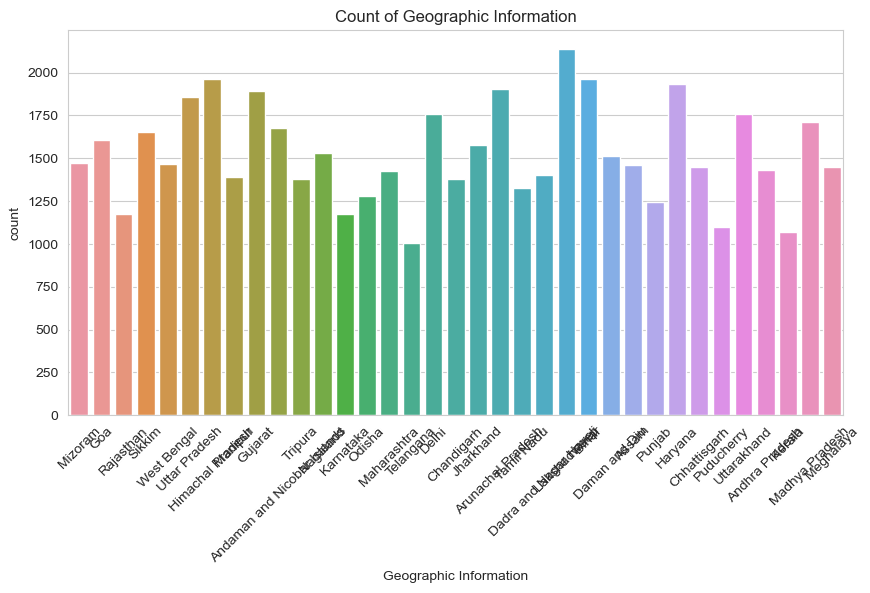

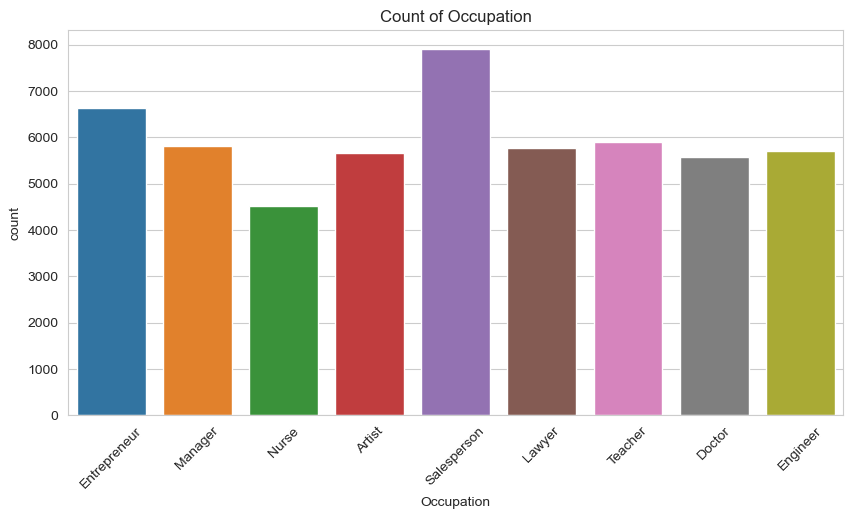

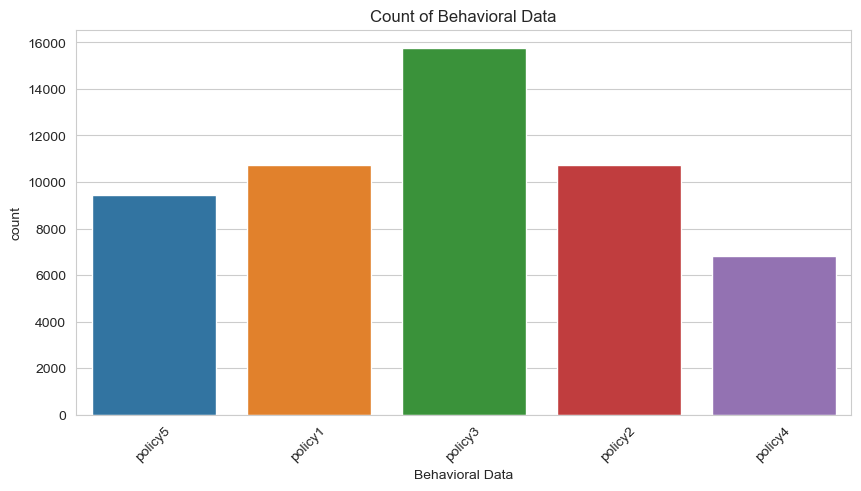

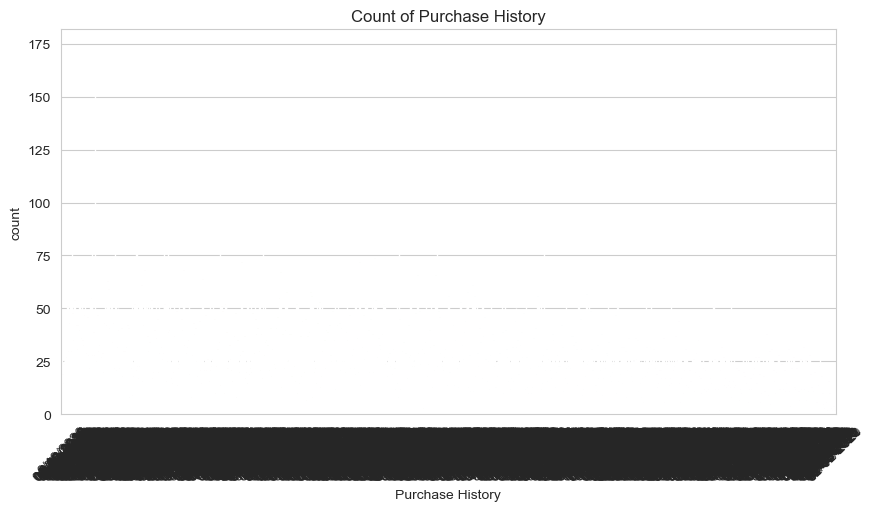

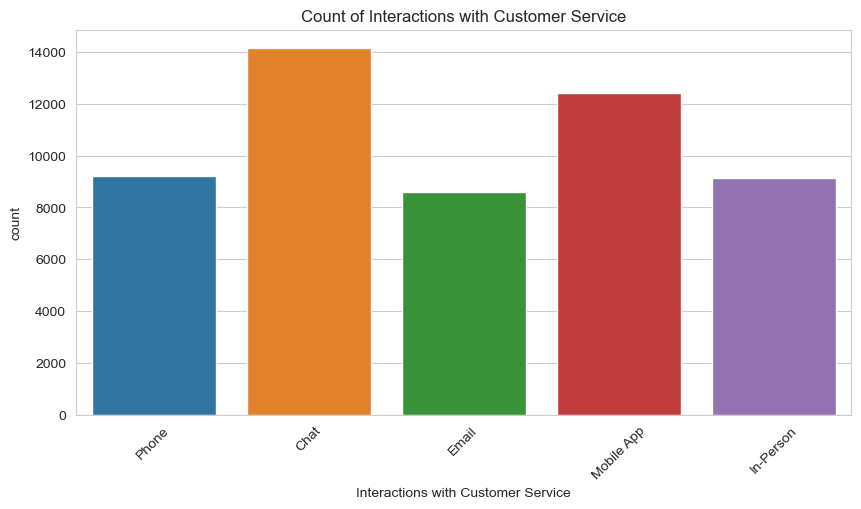

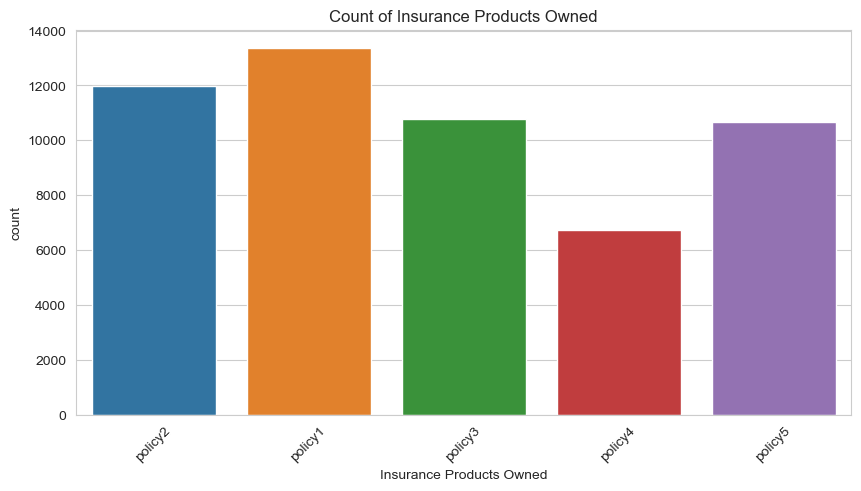

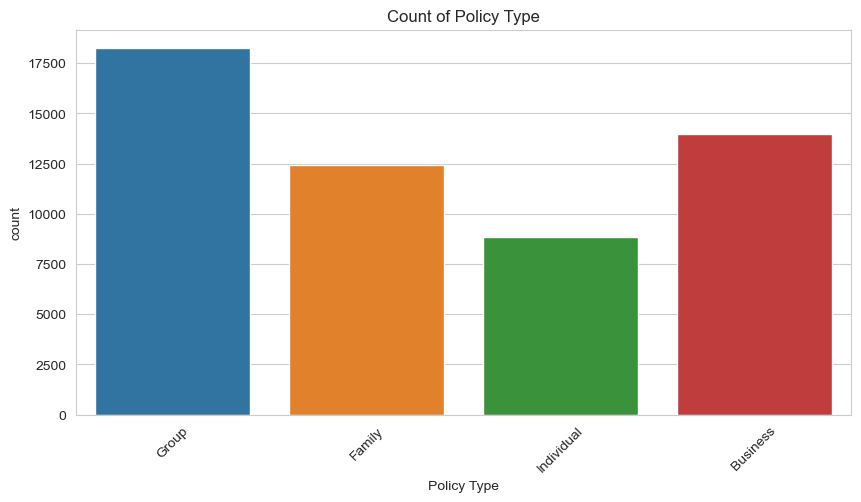

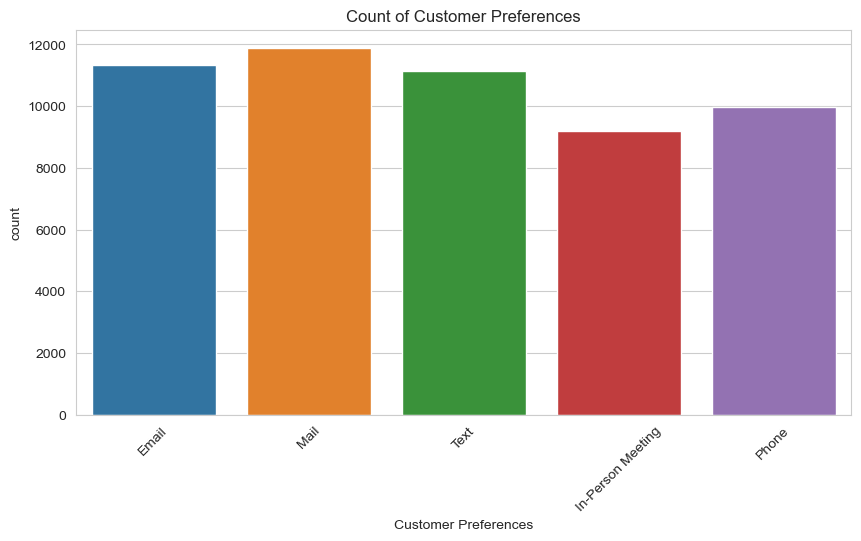

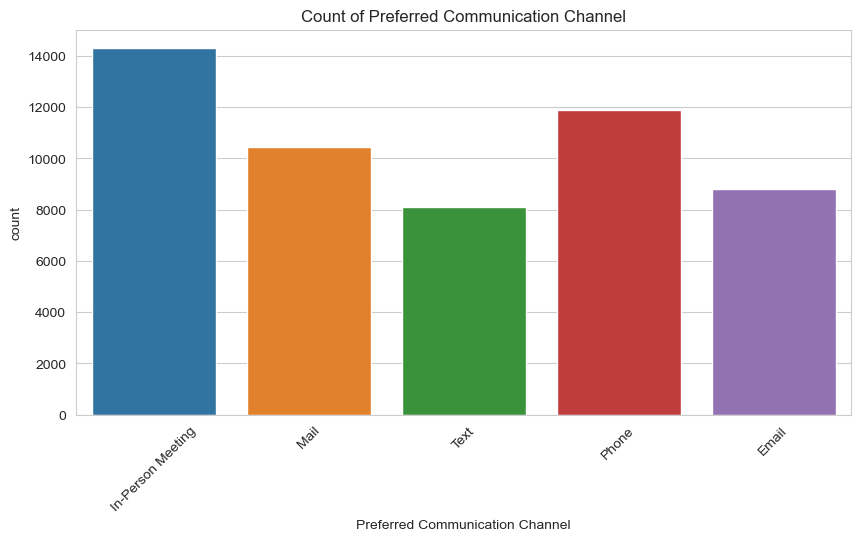

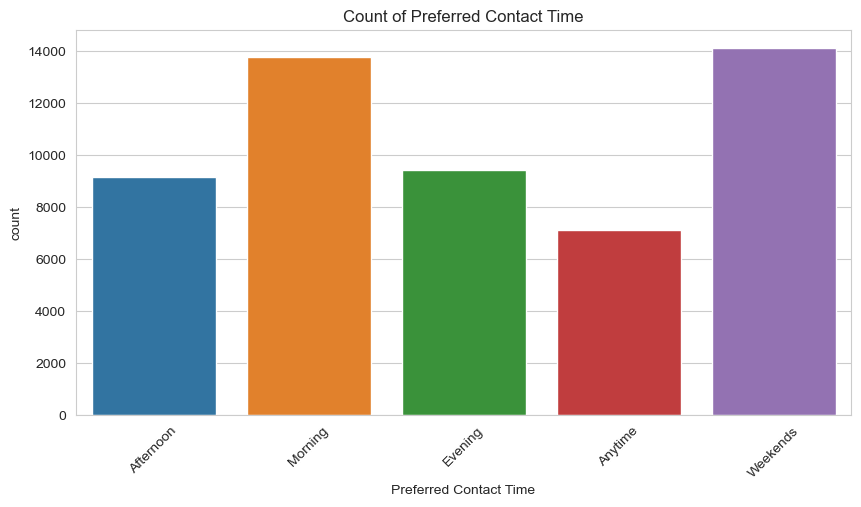

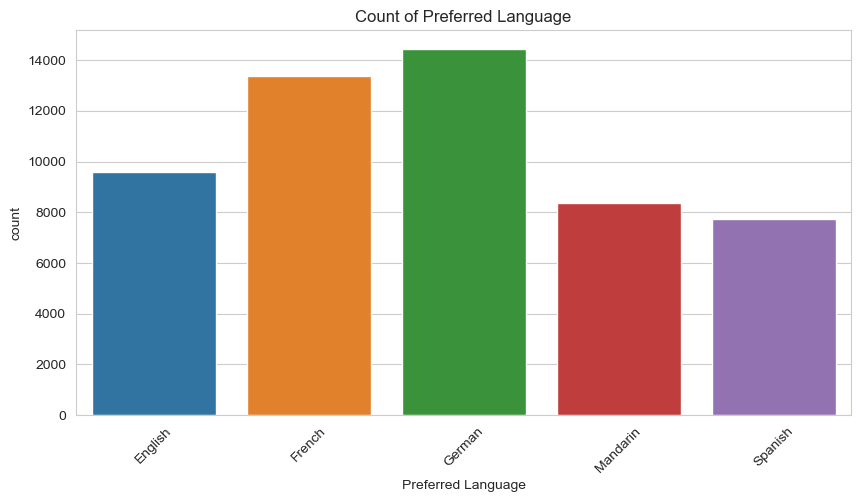

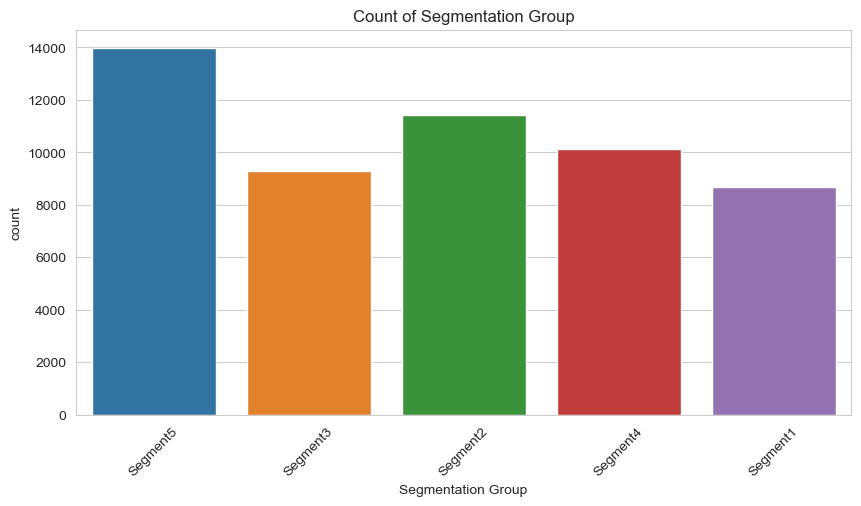

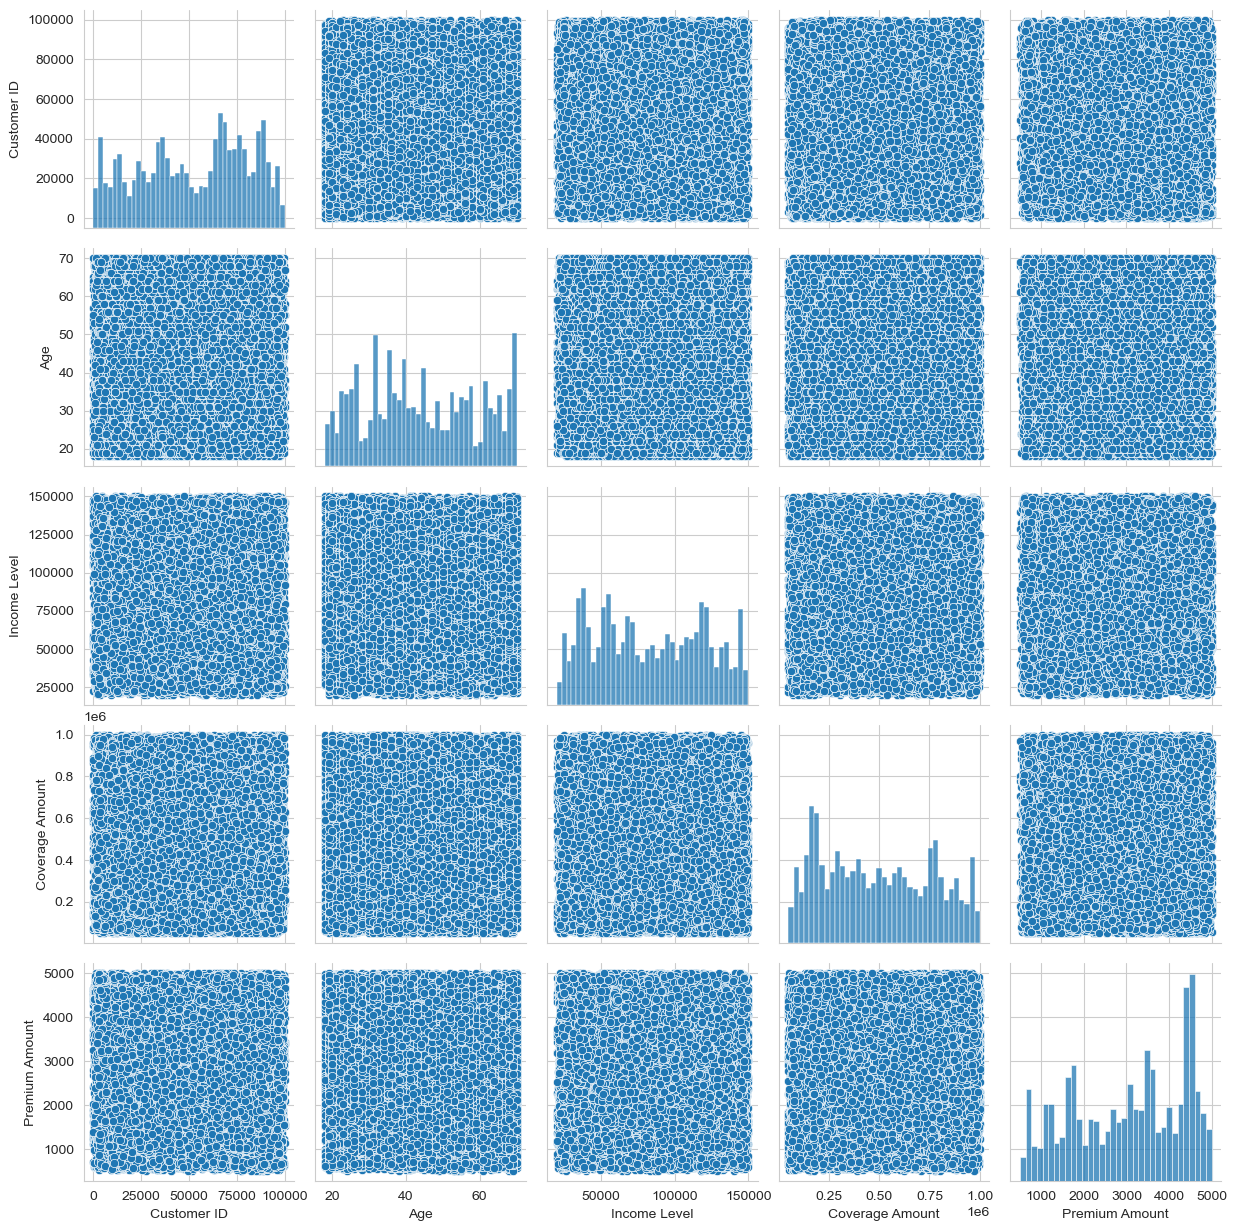

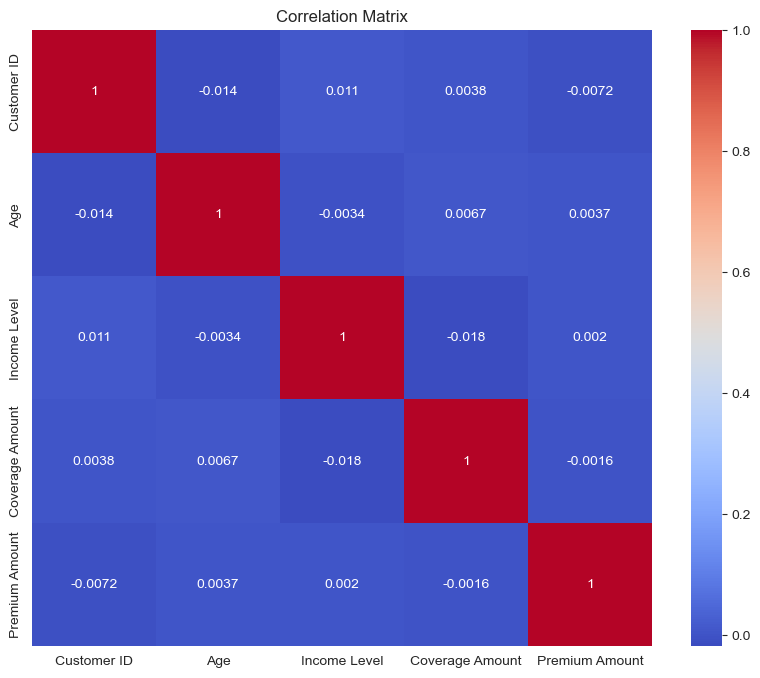

In [11]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Visualize the distribution of numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualize categorical features using bar plots
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=data)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Pair plot to visualize relationships between numerical features
sns.pairplot(data[numerical_cols])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


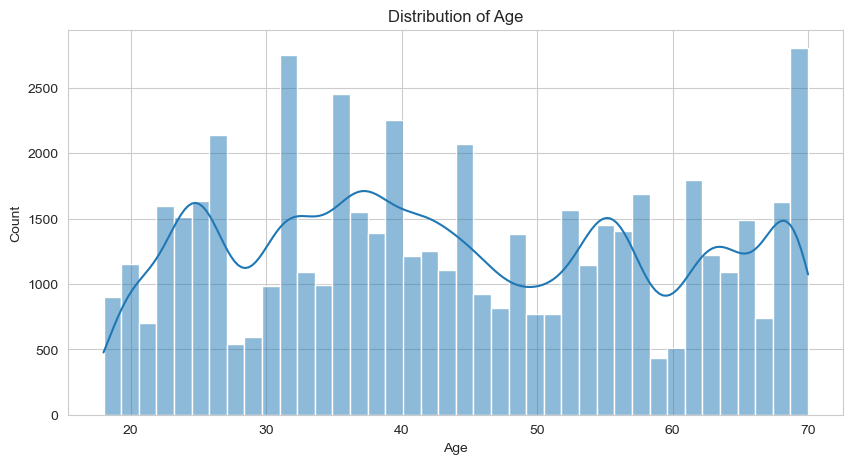

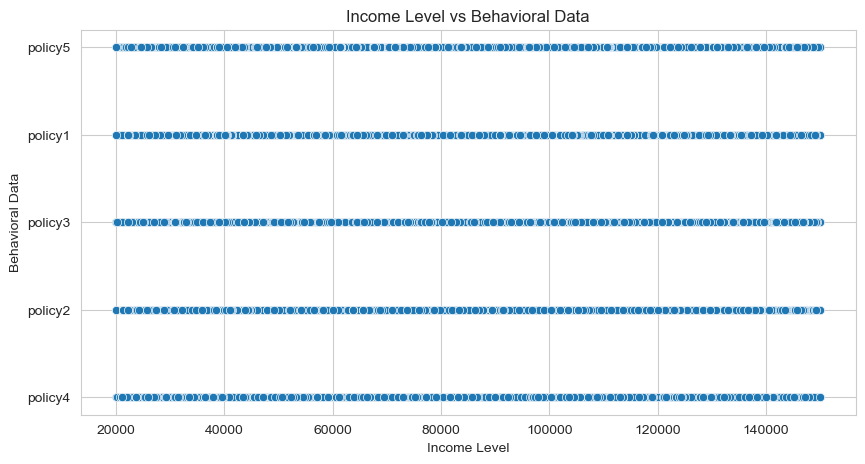

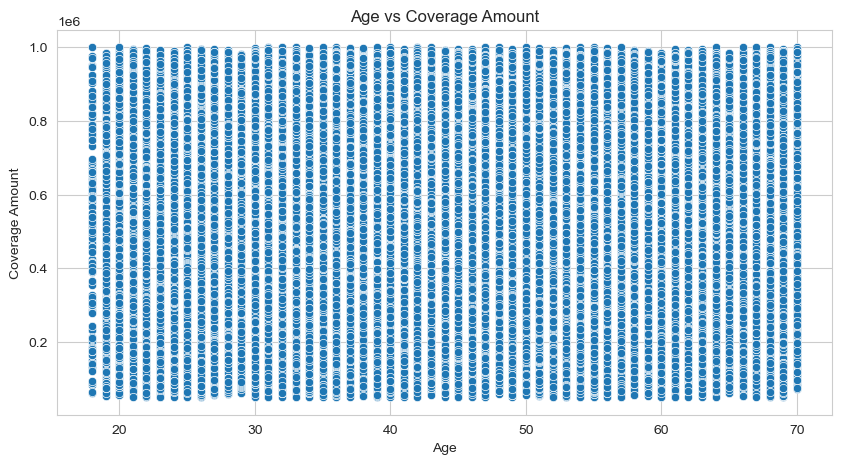

In [12]:
# Analyze specific features that might impact customer segmentation

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Relationship between Income Level and Spending Score
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Income Level', y='Behavioral Data', data=data)
plt.title('Income Level vs Behavioral Data')
plt.show()

# Relationship between Age and Coverage Amount
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Coverage Amount', data=data)
plt.title('Age vs Coverage Amount')
plt.show()


###### Customer segmentation using K-Means clustering. 

We'll follow these steps:

    1.Encode categorical variables.
    2.Standardize numerical features.
    3.Determine the Optimal Number of Clusters:
    4.Use the Elbow Method to find the optimal number of clusters.
    5.Fit the K-Means model with the optimal number of clusters.
    6.Assign cluster labels to the data.
    7.Explore the characteristics of each cluster.
    8.Visualize clusters using plots.

In [15]:
# Identify numerical and categorical columns correctly
categorical_features = ['Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Behavioral Data', 'Purchase History',  'Interactions with Customer Service', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language']
numerical_features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']

# Preprocessing pipeline for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
data_processed = preprocessor.fit_transform(data)

# Check the shape of the processed data to ensure it's correct
data_processed.shape


(53503, 2110)

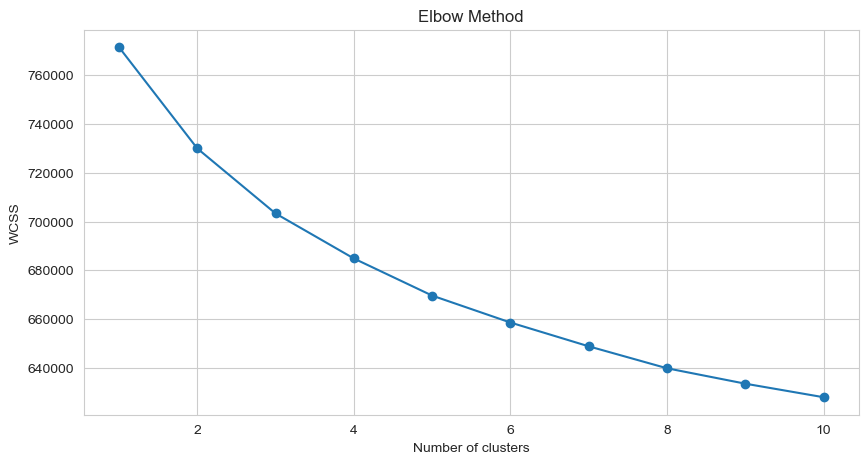

In [16]:

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_processed)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
# Apply K-Means with the optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_processed)


          Customer ID        Age   Income Level  Coverage Amount  \
Cluster                                                            
0        52185.553251  33.518327   50309.232469    473341.580446   
1        52294.827979  44.340762   83129.882779    260490.612156   
2        52194.809677  34.514270  121389.297297    480576.208562   
3        52881.670631  45.235335   78595.095133    784891.222744   
4        51844.976545  61.939328   81575.190324    476917.968755   

         Premium Amount  Cluster  
Cluster                           
0           3871.449022      0.0  
1           1593.309600      1.0  
2           3785.096579      2.0  
3           1793.856700      3.0  
4           3868.002423      4.0  


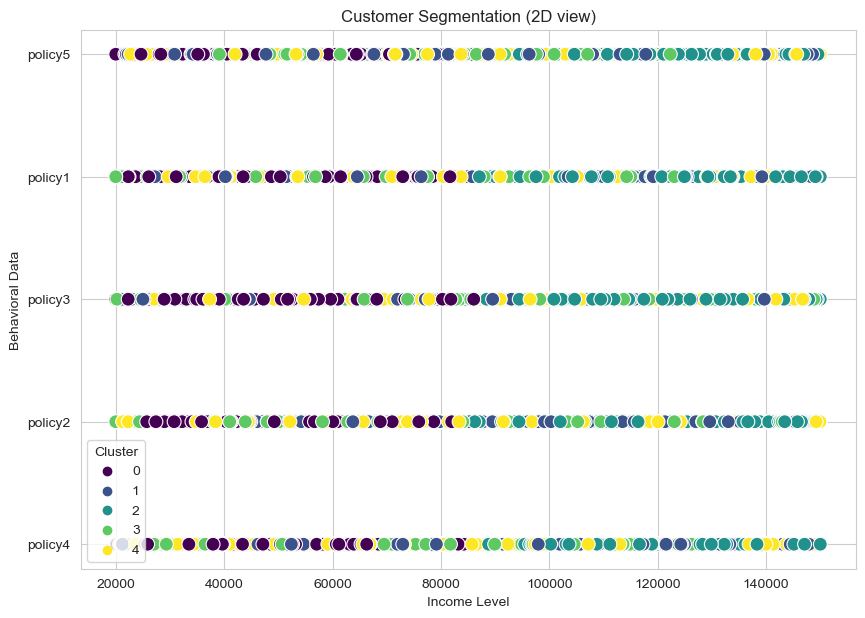

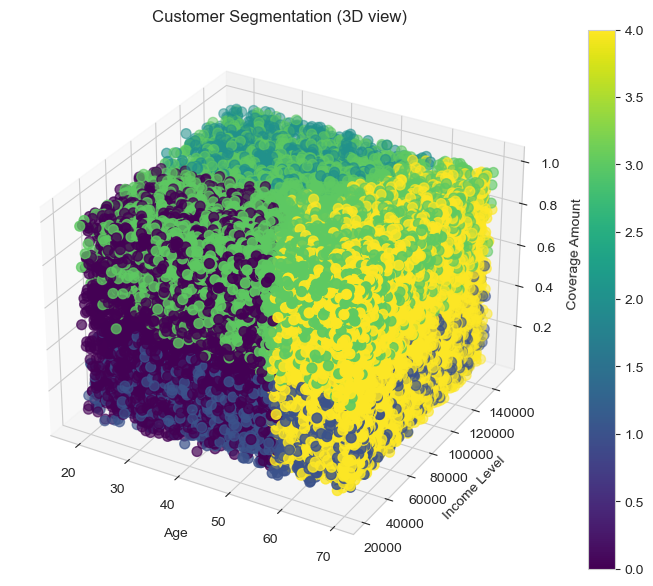

In [20]:
# Apply K-Means with the optimal number of clusters
optimal_clusters = 5  # Example, you should choose based on the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_processed)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Select only numeric columns for analysis
numeric_columns = data.select_dtypes(include=['number']).columns

# Analyze cluster characteristics
cluster_summary = data[numeric_columns].groupby(data['Cluster']).mean()
print(cluster_summary)

# Visualize clusters (2D and 3D if possible)
import seaborn as sns

# 2D visualization for selected features
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Income Level', y='Behavioral Data', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segmentation (2D view)')
plt.show()

# If you want to visualize in 3D, you can use the following code:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['Age'], data['Income Level'], data['Coverage Amount'], 
           c=data['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Income Level')
ax.set_zlabel('Coverage Amount')
plt.title('Customer Segmentation (3D view)')
plt.colorbar(sc)
plt.show()


The 3D visualization generated is a customer segmentation analysis using K-Means clustering. This analysis categorizes customer data into clusters based on three variables: Age, Income Level, and Coverage Amount. 

Here's a detailed interpretation of what the visualization means:

    Axes and Data Points:

    X-axis represents the Age of customers.
    Y-axis represents the Income Level of customers.
    Z-axis represents the Coverage Amount of insurance policies.

Each point in the 3D space represents an individual customer, colored according to their assigned cluster.
Clusters:

The points are colored using a colormap (viridis), which in this context represents the different clusters identified by the K-Means algorithm.

Since the visualization uses Coverage Amount for coloring, the color gradient indicates different levels of coverage, from lower amounts (dark colors) to higher amounts (bright colors).

Cluster Characteristics:

    Cluster 1 (dark blue/purple): This cluster represents younger customers with lower income levels and lower coverage amounts. These are young professionals or students who are just starting their careers.

    Cluster 2 (green): This cluster represents middle-aged customers with moderate income levels and coverage amounts. These are middle-income earners with moderate insurance needs.

    Cluster 3 (yellow): This cluster represents older customers with higher income levels and higher coverage amounts. These are high-income earners or retirees with significant insurance needs.
   

Segmentation Insights:

    Age vs. Income vs. Coverage Amount: The clustering indicates how different age groups correlate with income levels and coverage amounts. For instance, younger individuals tend to have lower income and coverage, while older individuals tend to have higher income and coverage.
    
    Targeted Marketing: Each cluster represents a distinct customer segment, which can be targeted with specific marketing strategies. For example, younger clusters may be offered entry-level insurance products, while older clusters may be offered premium insurance products.
    
    Product Development: Understanding the characteristics of each cluster can help in developing products tailored to the needs of each segment. For instance, creating flexible plans for younger customers and comprehensive plans for older, high-income customers.


Business Strategy:

    Retention and Acquisition: Strategies can be developed to retain high-value customers in the yellow cluster and acquire more customers similar to those in the green cluster.
    Customer Service: Tailoring customer service approaches based on the segment can enhance customer satisfaction and loyalty.
    
   
From the customer segmentation analysis using K-Means clustering, we can draw several key conclusions:


1. There is a clear correlation between age, income level, and coverage amount. Younger customers tend to have lower incomes and opt for lower coverage, while older customers have higher incomes and opt for higher coverage. This suggests that as customers age and their incomes increase, they are more likely to invest in higher coverage insurance policies.

2. Marketing and Product Development: 
    Targeted Marketing: Each cluster can be targeted with specific marketing strategies. For example, younger clusters (dark blue/purple) can be targeted with affordable, entry-level insurance products, while older clusters (yellow) can be targeted with premium, comprehensive insurance products.
    Product Customization: Insurance products can be tailored to meet the specific needs of each segment. For instance, flexible and scalable insurance plans for younger customers and more extensive coverage options for older customers.
    Strategic Business Decisions:

3. Customer Retention: Efforts can be focused on retaining high-value customers in the yellow cluster by offering them premium services and loyalty programs.
    Customer Acquisition: Marketing campaigns can be designed to attract more customers from the green cluster by highlighting the value and benefits of moderate coverage plans.

4. Different customer service approaches can be developed based on the segment characteristics. Younger customers might prefer more digital and self-service options, while older customers might value personalized and high-touch customer service.


Conclusion;
    The customer segmentation analysis reveals three distinct customer segments, each with unique characteristics and needs. By understanding these segments, the business can develop targeted marketing strategies, tailor product offerings, and enhance customer service to better meet the needs of each group. This segmentation provides a valuable framework for making data-driven decisions that can lead to increased customer satisfaction, loyalty, and overall business growth.